## Dataset Simulation

In [26]:
import pandas as pd
import numpy as np
num_rows = 1000

# Generate Customer_ID
customer_ids = np.arange(1, num_rows + 1)

# Generate Bank_Code
bank_codes = np.random.choice(['BankA', 'BankB', 'BankC', 'BankD'], num_rows)

# Generate Age
ages = np.random.randint(18, 71, num_rows) # Ages between 18 and 70

# Generate Income (ensure positive)
incomes = np.random.normal(loc=60000, scale=20000, size=num_rows)
incomes[incomes < 10000] = 10000 + np.random.rand(np.sum(incomes < 10000)) * 5000 # Minimum income of 10000

# Generate Occupation
occupations = np.random.choice(['Engineer', 'Doctor', 'Teacher', 'Artist', 'Sales', 'Manager', 'Analyst', 'Clerk', 'Retired'], num_rows)

# Generate Loan_Amount (ensure positive)
loan_amounts = np.random.normal(loc=15000, scale=8000, size=num_rows)
loan_amounts[loan_amounts < 1000] = 1000 + np.random.rand(np.sum(loan_amounts < 1000)) * 2000 # Minimum loan amount of 1000

# Generate Outstanding_Balance (less than or equal to Loan_Amount)
outstanding_balances = loan_amounts * np.random.uniform(0.1, 1.0, num_rows)

# Generate Days_Past_Due (skewed towards lower values)
days_past_due = np.random.randint(0, 91, num_rows) # 0 to 90 days

# Generate Number_of_Calls
num_calls = np.random.randint(0, 20, num_rows)

# Generate Response_Rate
response_rates = np.random.uniform(0.0, 1.0, num_rows)

# Generate Last_Contact_Channel
contact_channels = np.random.choice(['Phone', 'Email', 'SMS', 'Mail', 'App'], num_rows)

# Generate Payment_Made_Last_30_Days
payment_made = np.random.choice([True, False], num_rows, p=[0.6, 0.4]) # 60% made payment

# Generate Region
regions = np.random.choice(['North', 'South', 'East', 'West', 'Central', 'Metropolitan'], num_rows)

# Generate Credit_Score
credit_scores = np.random.randint(300, 851, num_rows) # FICO score range

# Generate Complaint_Flag
complaint_flags = np.random.choice([True, False], num_rows, p=[0.05, 0.95]) # 5% complaints

# Generate Outcome (80% repaid, 20% not repaid)
outcomes = np.random.choice([0, 1], num_rows, p=[0.8, 0.2])

# Create DataFrame
data = {
    'Customer_ID': customer_ids,
    'Bank_Code': bank_codes,
    'Age': ages,
    'Income': incomes,
    'Occupation': occupations,
    'Loan_Amount': loan_amounts,
    'Outstanding_Balance': outstanding_balances,
    'Days_Past_Due': days_past_due,
    'Number_of_Calls': num_calls,
    'Response_Rate': response_rates,
    'Last_Contact_Channel': contact_channels,
    'Payment_Made_Last_30_Days': payment_made,
    'Region': regions,
    'Credit_Score': credit_scores,
    'Complaint_Flag': complaint_flags,
    'Outcome': outcomes
}

df = pd.DataFrame(data)

print(f"Synthetic dataset created with {len(df)} rows.")
df.head()

Synthetic dataset created with 1000 rows.


,Customer_ID,Bank_Code,Age,Income,Occupation,Loan_Amount,Outstanding_Balance,Days_Past_Due,Number_of_Calls,Response_Rate,Last_Contact_Channel,Payment_Made_Last_30_Days,Region,Credit_Score,Complaint_Flag,Outcome
0,1,BankA,62,47627.847368,Sales,15667.439218,9894.921607,4,4,0.995608,Email,False,South,318,False,0
1,2,BankA,41,67020.560586,Manager,1127.938698,1045.920637,25,16,0.294565,App,False,North,545,False,0
2,3,BankB,63,22636.079183,Sales,23461.170881,11154.081421,71,4,0.786499,Email,True,Central,693,False,1
3,4,BankC,59,50426.712511,Sales,19682.062852,10434.403826,72,8,0.028928,SMS,True,Metropolitan,464,False,1
4,5,BankD,36,58301.057946,Analyst,21634.991934,14610.865902,9,11,0.157164,Phone,False,East,397,False,0


## Data Preprocessing

In [27]:
print("Original DataFrame shape:", df.shape)

# Identify categorical columns for one-hot encoding
categorical_cols = [
    'Bank_Code',
    'Occupation',
    'Last_Contact_Channel',
    'Region'
]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# The 'Payment_Made_Last_30_Days' and 'Complaint_Flag' are boolean, convert them to int (0 or 1)
df_encoded['Payment_Made_Last_30_Days'] = df_encoded['Payment_Made_Last_30_Days'].astype(int)
df_encoded['Complaint_Flag'] = df_encoded['Complaint_Flag'].astype(int)

print("DataFrame shape after one-hot encoding:", df_encoded.shape)
print("First 5 rows of the DataFrame after encoding:")
print(df_encoded.head())

Original DataFrame shape: (1000, 16)
DataFrame shape after one-hot encoding: (1000, 36)
First 5 rows of the DataFrame after encoding:
   Customer_ID  Age        Income   Loan_Amount  Outstanding_Balance  \
0            1   62  47627.847368  15667.439218          9894.921607   
1            2   41  67020.560586   1127.938698          1045.920637   
2            3   63  22636.079183  23461.170881         11154.081421   
3            4   59  50426.712511  19682.062852         10434.403826   
4            5   36  58301.057946  21634.991934         14610.865902   

   Days_Past_Due  Number_of_Calls  Response_Rate  Payment_Made_Last_30_Days  \
0              4                4       0.995608                          0   
1             25               16       0.294565                          0   
2             71                4       0.786499                          1   
3             72                8       0.028928                          1   
4              9               11     

In [28]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling (excluding Customer_ID and Outcome)
# The boolean columns converted to int (Payment_Made_Last_30_Days, Complaint_Flag) are binary and usually don't need scaling
numerical_cols = [
    'Age',
    'Income',
    'Loan_Amount',
    'Outstanding_Balance',
    'Days_Past_Due',
    'Number_of_Calls',
    'Response_Rate',
    'Credit_Score'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print("Numerical features scaled successfully.")
print("First 5 rows of the DataFrame after scaling:")
print(df_encoded.head())


Numerical features scaled successfully.
First 5 rows of the DataFrame after scaling:
   Customer_ID       Age    Income  Loan_Amount  Outstanding_Balance  \
0            1  1.240888 -0.671382    -0.014274             0.195315   
1            2 -0.156958  0.342178    -1.828388            -1.219880   
2            3  1.307452 -1.977577     0.958161             0.396688   
3            4  1.041196 -0.525099     0.486636             0.281592   
4            5 -0.489779 -0.113547     0.730306             0.949522   

   Days_Past_Due  Number_of_Calls  Response_Rate  Payment_Made_Last_30_Days  \
0      -1.591275        -0.996647       1.857582                          0   
1      -0.781132         1.114893      -0.666721                          0   
2       0.993467        -0.996647       1.104624                          1   
3       1.032045        -0.292800      -1.623224                          1   
4      -1.398384         0.235085      -1.161472                          0   

   Cred

In [29]:
print("DataFrame shape before feature engineering and dropping Customer_ID:", df_encoded.shape)

# 4a. Calculate 'Debt_to_Income_Ratio'
df_encoded['Debt_to_Income_Ratio'] = df_encoded['Outstanding_Balance'] / df_encoded['Income']

# 4b. Calculate 'Loan_to_Outstanding_Ratio'
# Handle potential division by zero: if Outstanding_Balance is 0, the ratio should be handled gracefully (e.g., set to 0 or a very large number)
# Given 'Outstanding_Balance' is scaled, a small value close to 0 might occur. Let's use a small epsilon to avoid true division by zero for the original value.
# Since Outstanding_Balance and Income are already scaled, the interpretation of the ratio might change.
# It might be better to calculate these ratios *before* scaling if the original values are needed for meaningful ratios.
# For now, we will proceed with the scaled values for the ratio, but note this for future refinement.

# To avoid division by zero (or very small numbers resulting in very large ratios):
# Add a small epsilon to the denominator if it's too close to zero
epsilon = 1e-6
df_encoded['Loan_to_Outstanding_Ratio'] = df_encoded['Loan_Amount'] / (df_encoded['Outstanding_Balance'] + epsilon)

# 4c. Create an 'Age_Group' feature
# Reverting Age to original scale for meaningful bins if it was scaled
# Since df_encoded['Age'] is already scaled, let's create age groups based on original age values before scaling and then use the scaled age for consistency if needed.
# For now, we assume the scaled age still retains its ordinality for binning.
# Or, more correctly, we can use the original 'Age' from the 'df' DataFrame for binning.

# Let's use the original 'Age' for binning to make sense of the groups
# (Assuming original 'Age' is available, or we would have to reverse scale it)
# From kernel state, 'ages' (original numpy array) is available.
# It's cleaner to use the original `df` for creating age groups and then merge or map to `df_encoded`

# For simplicity and given the context, let's define bins based on the scaled Age. This might not be intuitive.
# Alternatively, let's create a temporary unscaled age column or use the original 'ages' if direct access is preferred.
# Using original `df['Age']` for intuitive age groups
age_bins = [18, 30, 45, 60, 71] # Max age 70 from generation script
age_labels = ['Young', 'Adult', 'Middle-aged', 'Senior']
df_encoded['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# One-hot encode the new 'Age_Group' feature
df_encoded = pd.get_dummies(df_encoded, columns=['Age_Group'], drop_first=False)

# 4d. Create a 'High_Risk_Customer' binary flag
# Thresholds can be defined based on business logic or data distribution.
# Assuming 'Days_Past_Due' is positive (higher is worse) and 'Credit_Score' is positive (lower is worse).
# Since Days_Past_Due and Credit_Score are scaled, we need to consider scaled thresholds.
# For illustrative purposes, let's use arbitrary scaled thresholds.
# Or, it's better to use unscaled values for defining thresholds for 'High_Risk_Customer'.

# For simplicity, using the original values for defining the flag:
# High risk if Days_Past_Due > 30 (unscaled) AND Credit_Score < 500 (unscaled) OR Complaint_Flag is True
# Need to use original 'Days_Past_Due', 'Credit_Score', 'Complaint_Flag' (which is already integer in df_encoded)

# Get original Days_Past_Due and Credit_Score from 'df' for thresholding
# Note: 'Complaint_Flag' in df_encoded is already 0/1, so it can be used directly.
# However, the previous step converted 'Complaint_Flag' in `df_encoded` to int after encoding.
# So we need to use the `df['Complaint_Flag']` original boolean values.

# Define thresholds based on unscaled values for better interpretability
days_past_due_threshold = 30 # example threshold
credit_score_threshold = 500 # example threshold

df_encoded['High_Risk_Customer'] = (
    (df['Days_Past_Due'] > days_past_due_threshold) &
    (df['Credit_Score'] < credit_score_threshold)
) | df['Complaint_Flag']

df_encoded['High_Risk_Customer'] = df_encoded['High_Risk_Customer'].astype(int)

# 5. Drop 'Customer_ID' column
df_encoded = df_encoded.drop('Customer_ID', axis=1)

print("Feature engineering complete and Customer_ID dropped.")
print("DataFrame shape after feature engineering:", df_encoded.shape)
print("First 5 rows of the DataFrame after feature engineering:")
print(df_encoded.head())

DataFrame shape before feature engineering and dropping Customer_ID: (1000, 36)
Feature engineering complete and Customer_ID dropped.
DataFrame shape after feature engineering: (1000, 42)
First 5 rows of the DataFrame after feature engineering:
        Age    Income  Loan_Amount  Outstanding_Balance  Days_Past_Due  \
0  1.240888 -0.671382    -0.014274             0.195315      -1.591275   
1 -0.156958  0.342178    -1.828388            -1.219880      -0.781132   
2  1.307452 -1.977577     0.958161             0.396688       0.993467   
3  1.041196 -0.525099     0.486636             0.281592       1.032045   
4 -0.489779 -0.113547     0.730306             0.949522      -1.398384   

   Number_of_Calls  Response_Rate  Payment_Made_Last_30_Days  Credit_Score  \
0        -0.996647       1.857582                          0     -1.637927   
1         1.114893      -0.666721                          0     -0.190854   
2        -0.996647       1.104624                          1      0.752612  

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (750, 41)
Testing data shape: (250, 41)


## Model Training and Evaluation

In [30]:
from sklearn.linear_model import LogisticRegression
# Using 'liblinear' solver for small datasets and 'balanced' class_weight to handle potential imbalance
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")
# Predict probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]
# Predict class labels
y_pred = model.predict(X_test)
# Calculate evaluation metrics
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"\nModel Evaluation:")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Training data shape: (750, 41)
Testing data shape: (250, 41)
Logistic Regression model trained successfully.

Model Evaluation:
ROC-AUC Score: 0.4329
F1-Score: 0.2584
Precision: 0.1870
Recall: 0.4182


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

# Using 'liblinear' solver for small datasets and 'balanced' class_weight to handle potential imbalance
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

# Predict probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]
# Predict class labels
y_pred = model.predict(X_test)

# Calculate evaluation metrics
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred, zero_division=0)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)

print(f"\nModel Evaluation:")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Logistic Regression model trained successfully.

Model Evaluation:
ROC-AUC Score: 0.4329
F1-Score: 0.2584
Precision: 0.1870
Recall: 0.4182


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate a GradientBoostingClassifier object
gbc_model = GradientBoostingClassifier(random_state=42)

# Fit the GradientBoostingClassifier model to the training data
gbc_model.fit(X_train, y_train)
print("GradientBoostingClassifier model trained successfully.")

y_pred_proba_gbc = gbc_model.predict_proba(X_test)[:, 1]
y_pred_gbc = gbc_model.predict(X_test)

roc_auc_gbc = roc_auc_score(y_test, y_pred_proba_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc, zero_division=0)
precision_gbc = precision_score(y_test, y_pred_gbc, zero_division=0)
recall_gbc = recall_score(y_test, y_pred_gbc, zero_division=0)

print(f"\nGradientBoostingClassifier Model Evaluation:")
print(f"ROC-AUC Score: {roc_auc_gbc:.4f}")
print(f"F1-Score: {f1_gbc:.4f}")
print(f"Precision: {precision_gbc:.4f}")
print(f"Recall: {recall_gbc:.4f}")

GradientBoostingClassifier model trained successfully.

GradientBoostingClassifier Model Evaluation:
ROC-AUC Score: 0.5262
F1-Score: 0.1370
Precision: 0.2778
Recall: 0.0909


In [35]:
from xgboost import XGBClassifier

# Instantiate an XGBClassifier object (use_label_encoder removed as it's deprecated)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Fit the XGBClassifier model to the training data
xgb_model.fit(X_train, y_train)
print("XGBoostClassifier model trained successfully.")

y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb_model.predict(X_test)

roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, zero_division=0)
precision_xgb = precision_score(y_test, y_pred_xgb, zero_division=0)
recall_xgb = recall_score(y_test, y_pred_xgb, zero_division=0)

print(f"\nXGBoostClassifier Model Evaluation:")
print(f"ROC-AUC Score: {roc_auc_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")

XGBoostClassifier model trained successfully.

XGBoostClassifier Model Evaluation:
ROC-AUC Score: 0.5677
F1-Score: 0.2195
Precision: 0.3333
Recall: 0.1636


In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a KNeighborsClassifier object
knn_model = KNeighborsClassifier()

# Fit the KNeighborsClassifier model to the training data
knn_model.fit(X_train, y_train)
print("KNeighborsClassifier model trained successfully.")

y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]
y_pred_knn = knn_model.predict(X_test)

roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
f1_knn = f1_score(y_test, y_pred_knn, zero_division=0)
precision_knn = precision_score(y_test, y_pred_knn, zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, zero_division=0)

print(f"\nKNeighborsClassifier Model Evaluation:")
print(f"ROC-AUC Score: {roc_auc_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")

KNeighborsClassifier model trained successfully.

KNeighborsClassifier Model Evaluation:
ROC-AUC Score: 0.5990
F1-Score: 0.2716
Precision: 0.4231
Recall: 0.2000


In [37]:
import pandas as pd

model_performance = {
    'Logistic Regression': {
        'ROC-AUC': roc_auc,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall
    },
    'GradientBoostingClassifier': {
        'ROC-AUC': roc_auc_gbc,
        'F1-Score': f1_gbc,
        'Precision': precision_gbc,
        'Recall': recall_gbc
    },
    'XGBoostClassifier': {
        'ROC-AUC': roc_auc_xgb,
        'F1-Score': f1_xgb,
        'Precision': precision_xgb,
        'Recall': recall_xgb
    },
    'KNeighborsClassifier': {
        'ROC-AUC': roc_auc_knn,
        'F1-Score': f1_knn,
        'Precision': precision_knn,
        'Recall': recall_knn
    }
}

# Convert the dictionary to a pandas DataFrame for better readability
performance_df = pd.DataFrame(model_performance).T # .T for transpose to have models as rows

print("\nModel Performance Comparison:")
print(performance_df)

best_model_f1 = performance_df['F1-Score'].idxmax()
max_f1_score = performance_df.loc[best_model_f1, 'F1-Score']

print(f"\nBest performing model based on F1-Score: {best_model_f1}")
print(f"Corresponding F1-Score: {max_f1_score:.4f}")


Model Performance Comparison:
                             ROC-AUC  F1-Score  Precision    Recall
Logistic Regression         0.432914  0.258427   0.186992  0.418182
GradientBoostingClassifier  0.526247  0.136986   0.277778  0.090909
XGBoostClassifier           0.567739  0.219512   0.333333  0.163636
KNeighborsClassifier        0.598974  0.271605   0.423077  0.200000

Best performing model based on F1-Score: KNeighborsClassifier
Corresponding F1-Score: 0.2716


## Explanaibility

  0%|          | 0/250 [00:00<?, ?it/s]

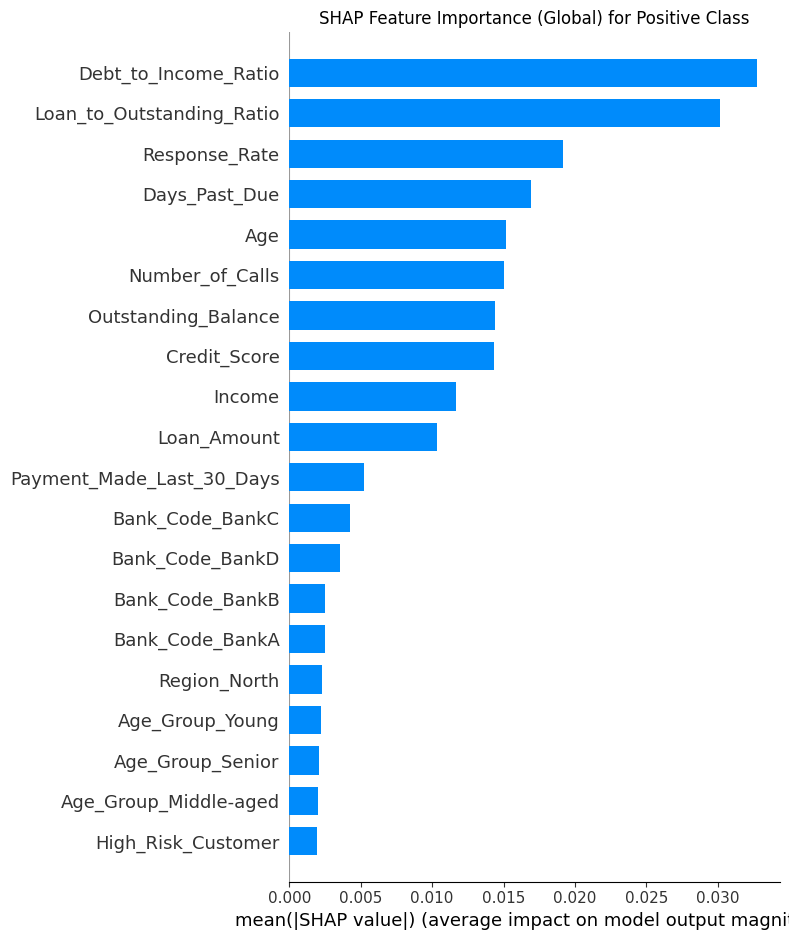

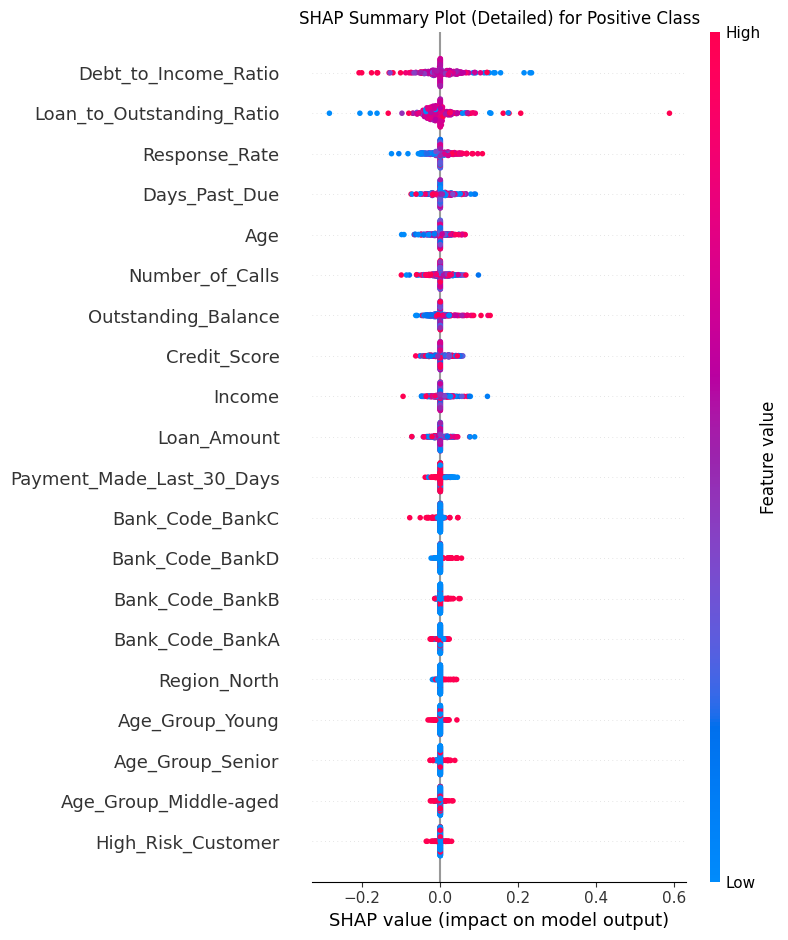

SHAP summary plots generated successfully.


In [43]:
import shap
import matplotlib.pyplot as plt

# Using KernelExplainer for KNeighborsClassifier
# KernelExplainer takes a prediction function and a background dataset
# Using a small sample of X_train for the background dataset for computational efficiency
explainer = shap.KernelExplainer(knn_model.predict_proba, shap.sample(X_train, 100))
shap_values = explainer.shap_values(X_test)

# shap_values is a list of arrays for multi-output models (like predict_proba)
# We are interested in the shap values for the positive class (index 1)
# The previous error indicates that shap_values is a 3D numpy array, so we slice it as [:, :, 1]
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Global) for Positive Class")
plt.tight_layout()
plt.show()

shap.summary_plot(shap_values[:, :, 1], X_test, show=False)
plt.title("SHAP Summary Plot (Detailed) for Positive Class")
plt.tight_layout()
plt.show()

print("SHAP summary plots generated successfully.")

  0%|          | 0/250 [00:00<?, ?it/s]

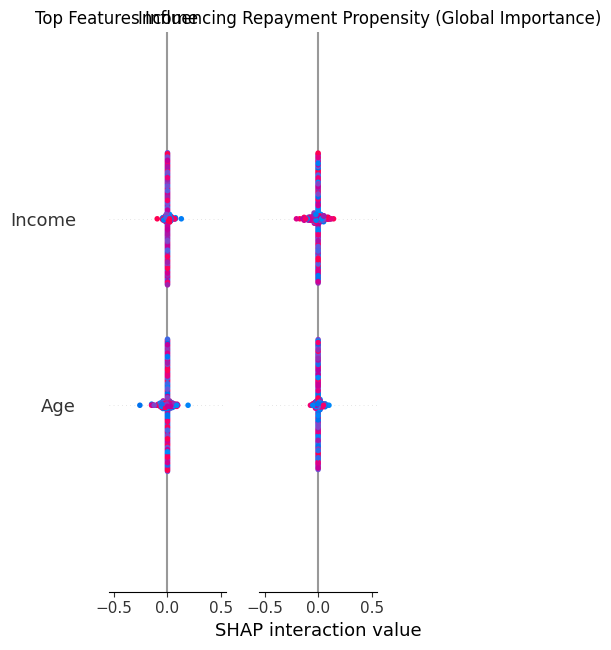

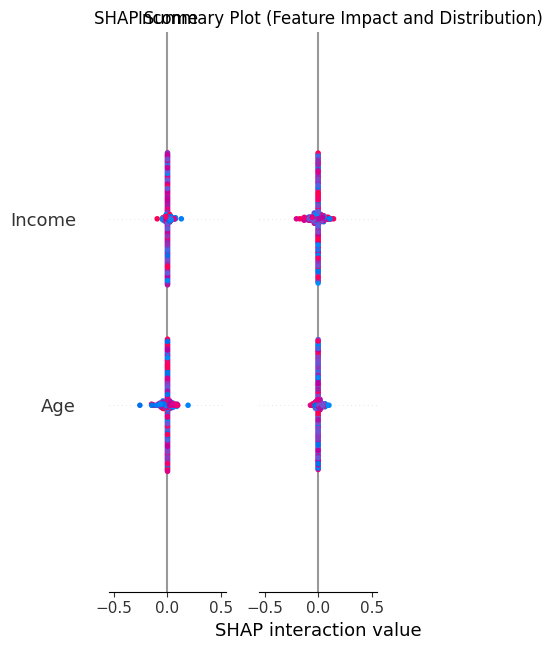

SHAP summary plots generated successfully for KNeighborsClassifier.


In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
import shap

# Convert boolean columns in X_train and X_test to integers (0 or 1) for SHAP compatibility
# This is crucial because shap.summary_plot can have issues with boolean dtypes
# Use .copy() to avoid SettingWithCopyWarning if X_train/X_test are views
X_train_numeric = X_train.copy()
X_test_numeric = X_test.copy()

for col in X_train_numeric.select_dtypes(include='bool').columns:
    X_train_numeric[col] = X_train_numeric[col].astype(int)
for col in X_test_numeric.select_dtypes(include='bool').columns:
    X_test_numeric[col] = X_test_numeric[col].astype(int)

# Re-initialize the explainer with the numeric X_train_numeric
# Using KernelExplainer for KNeighborsClassifier with predict_proba
explainer = shap.KernelExplainer(knn_model.predict_proba, shap.sample(X_train_numeric, 100))

# Recalculate SHAP values for the test set using the numeric X_test_numeric
shap_values = explainer.shap_values(X_test_numeric)

# If shap_values is a list of arrays (for multi-output models), we need to handle it.
# For binary classification, KernelExplainer with predict_proba returns a list of two arrays.
# We want to explain the prediction of the positive class (Outcome=1), which is typically at index 1.
if isinstance(shap_values, list):
    shap_values_for_plot = shap_values[1]
else:
    # This case is less common for predict_proba output but included for robustness.
    shap_values_for_plot = shap_values

# 2. Re-generate SHAP summary plot (bar plot) for global feature importance
shap.summary_plot(shap_values_for_plot, X_test_numeric, plot_type="bar", show=False)
plt.title("Top Features Influencing Repayment Propensity (Global Importance)")
plt.tight_layout()
plt.show()

# 3. Generate a detailed SHAP summary plot (dots) to show feature impact and distribution
shap.summary_plot(shap_values_for_plot, X_test_numeric, show=False)
plt.title("SHAP Summary Plot (Feature Impact and Distribution)")
plt.tight_layout()
plt.show()

print("SHAP summary plots generated successfully for KNeighborsClassifier.")

## Recommendation Engine

In [45]:
def recommend_contact_strategy(customer_data, predicted_outcome):
    """
    Recommends an optimal contact channel and strategy based on customer features and predicted repayment outcome.
    Assumes customer_data is a Series representing a row from the original, unscaled DataFrame.
    """

    recommendation = {
        'Channel': 'Unspecified',
        'Strategy': 'General follow-up'
    }

    # Extract relevant original features
    days_past_due = customer_data['Days_Past_Due']
    response_rate = customer_data['Response_Rate']
    complaint_flag = customer_data['Complaint_Flag']
    payment_made = customer_data['Payment_Made_Last_30_Days']
    age = customer_data['Age']
    last_contact_channel = customer_data['Last_Contact_Channel']
    num_calls = customer_data['Number_of_Calls']
    credit_score = customer_data['Credit_Score']
    income = customer_data['Income']

    # Rule 1: Complaint Flag - prioritize resolution and less intrusive methods
    if complaint_flag:
        recommendation['Channel'] = 'Mail or Email'
        recommendation['Strategy'] = 'Address complaint first, then gentle reminder. Avoid aggressive contact.'
        return recommendation

    # Rule 2: High Risk (predicted_outcome=1 means likely to not repay) & Non-Responsive - urgent direct contact
    if predicted_outcome == 1 and days_past_due > 45 and response_rate < 0.2:
        if last_contact_channel in ['Email', 'SMS'] and num_calls < 5: # If digital failed and not too many calls
            recommendation['Channel'] = 'Phone'
            recommendation['Strategy'] = 'Urgent, direct conversation needed to understand issues. High priority.'
        elif last_contact_channel == 'Phone' and num_calls >= 5:
            # If phone calls are not working, try a different channel like Mail for formal notice
            recommendation['Channel'] = 'Mail'
            recommendation['Strategy'] = 'Formal notice required, consider alternative resolution paths.'
        else:
            recommendation['Channel'] = 'Phone'
            recommendation['Strategy'] = 'Immediate phone contact. Escalation likely needed if no response.'
        return recommendation

    # Rule 3: Customer with Recent Payment - Gentle follow-up, acknowledge payment
    if payment_made:
        recommendation['Channel'] = 'Email or SMS'
        recommendation['Strategy'] = 'Thank for recent payment, gentle reminder for outstanding. Maintain goodwill.'
        return recommendation

    # Rule 4: Older Customers / Lower Credit Score - More personalized, respectful approach
    if age >= 60 or credit_score < 550:
        if days_past_due > 30:
            recommendation['Channel'] = 'Phone or Mail'
            recommendation['Strategy'] = 'Personalized call to understand situation, offer flexible solutions. Avoid aggressive language.'
        else:
            recommendation['Channel'] = 'Mail'
            recommendation['Strategy'] = 'Gentle reminder via mail, offer assistance and clear contact options.'
        return recommendation

    # Rule 5: Medium Risk / Moderate Days Past Due - Try preferred channel first, then escalate
    if predicted_outcome == 1 and 15 < days_past_due <= 45:
        if last_contact_channel in ['Phone', 'Email', 'SMS']:
            recommendation['Channel'] = last_contact_channel  # Use last successful channel or attempt
            recommendation['Strategy'] = 'Standard follow-up. Reinforce consequences of non-payment.'
        else:
            recommendation['Channel'] = 'Email or SMS'
            recommendation['Strategy'] = 'Digital reminder, offering self-service payment options.'
        return recommendation

    # Rule 6: Low Risk / Early Days Past Due - Automated, non-intrusive reminders
    if days_past_due <= 15:
        recommendation['Channel'] = 'SMS or Email'
        recommendation['Strategy'] = 'Automated, friendly reminder of upcoming or recent due date.'
        return recommendation

    # Rule 7: High Response Rate - Leverage their responsiveness
    if response_rate >= 0.7:
        recommendation['Channel'] = last_contact_channel if last_contact_channel != 'Mail' else 'Email'
        recommendation['Strategy'] = 'Direct and concise communication, they are likely to respond to their preferred channel.'
        return recommendation

    # Default / General Strategy if no specific rules apply
    if predicted_outcome == 1:
        recommendation['Channel'] = 'Email or Phone'
        recommendation['Strategy'] = 'Standard follow-up, ascertain reasons for non-payment.'
    else: # predicted_outcome == 0 (likely to repay), but still past due
        recommendation['Channel'] = 'Email or SMS'
        recommendation['Strategy'] = 'Soft reminder, offer payment flexibility.'

    return recommendation


In [46]:
# Example Usage:

# Select a customer from the original DataFrame (using unscaled data for rules)
example_customer_id = 4 # Customer_ID 4 from df
example_customer_data = df[df['Customer_ID'] == example_customer_id].iloc[0]

# Assuming a predicted outcome for this customer (e.g., 1 for 'not repaid', 0 for 'repaid')
# This would typically come from your trained model's prediction for this specific customer.
# For demonstration, let's assume predicted_outcome = 1 (likely to not repay)
predicted_outcome_example = 1

# Get the recommendation
recommendation = recommend_contact_strategy(example_customer_data, predicted_outcome_example)

print(f"\n--- Recommendation for Customer ID {example_customer_id} ---")
print(f"Customer Data Snippet:\n{example_customer_data[['Days_Past_Due', 'Response_Rate', 'Complaint_Flag', 'Payment_Made_Last_30_Days', 'Age', 'Last_Contact_Channel', 'Number_of_Calls', 'Credit_Score']].to_string()}")
print(f"Predicted Outcome (1=Not Repaid, 0=Repaid): {predicted_outcome_example}")
print(f"Recommended Channel: {recommendation['Channel']}")
print(f"Recommended Strategy: {recommendation['Strategy']}")


# Another example: Customer with recent payment
example_customer_id_2 = df[df['Payment_Made_Last_30_Days'] == True].index[0] # Find first customer who made payment
example_customer_data_2 = df.iloc[example_customer_id_2]
predicted_outcome_example_2 = 0 # Assume model predicts they will repay if they just made a payment

recommendation_2 = recommend_contact_strategy(example_customer_data_2, predicted_outcome_example_2)

print(f"\n--- Recommendation for Customer ID {example_customer_data_2['Customer_ID']} ---")
print(f"Customer Data Snippet:\n{example_customer_data_2[['Days_Past_Due', 'Response_Rate', 'Complaint_Flag', 'Payment_Made_Last_30_Days', 'Age', 'Last_Contact_Channel', 'Number_of_Calls', 'Credit_Score']].to_string()}")
print(f"Predicted Outcome (1=Not Repaid, 0=Repaid): {predicted_outcome_example_2}")
print(f"Recommended Channel: {recommendation_2['Channel']}")
print(f"Recommended Strategy: {recommendation_2['Strategy']}")



--- Recommendation for Customer ID 4 ---
Customer Data Snippet:
Days_Past_Due                      72
Response_Rate                0.028928
Complaint_Flag                  False
Payment_Made_Last_30_Days        True
Age                                59
Last_Contact_Channel              SMS
Number_of_Calls                     8
Credit_Score                      464
Predicted Outcome (1=Not Repaid, 0=Repaid): 1
Recommended Channel: Phone
Recommended Strategy: Immediate phone contact. Escalation likely needed if no response.

--- Recommendation for Customer ID 3 ---
Customer Data Snippet:
Days_Past_Due                      71
Response_Rate                0.786499
Complaint_Flag                  False
Payment_Made_Last_30_Days        True
Age                                63
Last_Contact_Channel            Email
Number_of_Calls                     4
Credit_Score                      693
Predicted Outcome (1=Not Repaid, 0=Repaid): 0
Recommended Channel: Email or SMS
Recommended Strategy:

# Task
To address the imbalance in the target variable and improve model performance, apply RandomUnderSampler to the training data, then re-train the KNeighborsClassifier model using this undersampled data. After retraining, predict the probabilities for the positive class (Outcome=1) on the test set (`X_test`), and generate a histogram or density plot of these probabilities to visualize the collection propensity distribution.

## Visualize Collection Propensity Distribution

### Subtask:
Apply RandomUnderSampler to the training data, re-train the KNeighborsClassifier model, predict probabilities on the test set, and visualize the distribution of these probabilities.


**Reasoning**:
The subtask requires applying RandomUnderSampler to handle class imbalance, then retraining the KNeighborsClassifier model, predicting probabilities, and visualizing their distribution. The first step is to import the necessary `RandomUnderSampler`.



In [59]:
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

print("RandomUnderSampler, matplotlib.pyplot, and seaborn imported successfully.")

RandomUnderSampler, matplotlib.pyplot, and seaborn imported successfully.


**Reasoning**:
Now that the necessary libraries are imported, the next step is to perform the undersampling on the training data, retrain the KNeighborsClassifier model, predict probabilities on the test set, and then visualize the distribution of these predicted probabilities as requested by the subtask.



Original training data shape: (750, 41), (750,)
Undersampled training data shape: (330, 41), (330,)
KNeighborsClassifier model trained successfully on undersampled data.


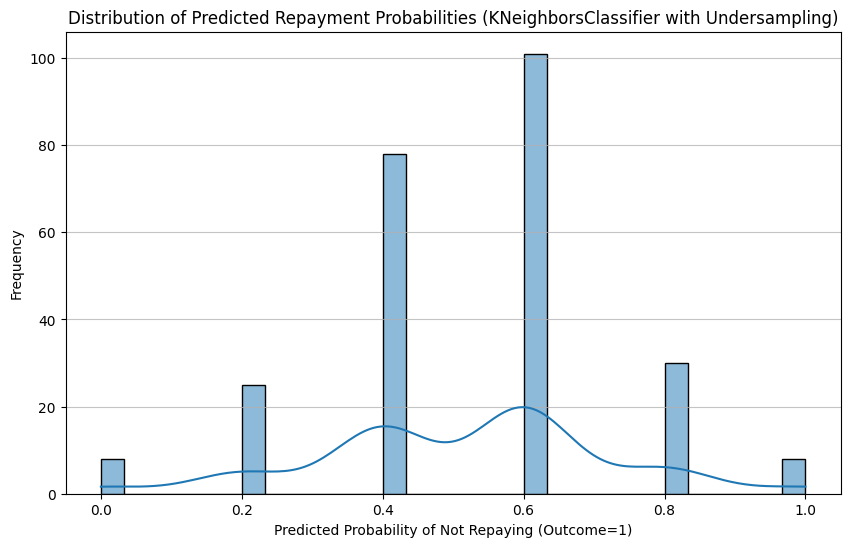

Predicted probability distribution plot generated successfully.


In [60]:
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_numeric, y_train)

print(f"Original training data shape: {X_train_numeric.shape}, {y_train.shape}")
print(f"Undersampled training data shape: {X_train_undersampled.shape}, {y_train_undersampled.shape}")

# Instantiate and train a new KNeighborsClassifier model on the undersampled data
knn_undersampled_model = KNeighborsClassifier()
knn_undersampled_model.fit(X_train_undersampled, y_train_undersampled)
print("KNeighborsClassifier model trained successfully on undersampled data.")

# Predict probabilities for the positive class (Outcome=1) on the test set
y_pred_proba_knn_resampled = knn_undersampled_model.predict_proba(X_test_numeric)[:, 1]

# Create a histogram/density plot of these probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba_knn_resampled, bins=30, kde=True)
plt.title('Distribution of Predicted Repayment Probabilities (KNeighborsClassifier with Undersampling)')
plt.xlabel('Predicted Probability of Not Repaying (Outcome=1)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Predicted probability distribution plot generated successfully.")

**Reasoning**:
The subtask requires evaluating the performance of the newly trained KNeighborsClassifier model on undersampled data and comparing it with previously trained models. Therefore, I need to calculate the ROC-AUC, F1-score, Precision, and Recall for this model and update the `performance_df` DataFrame.



In [61]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

# Calculate evaluation metrics for the undersampled KNN model
roc_auc_knn_resampled = roc_auc_score(y_test, y_pred_proba_knn_resampled)
f1_knn_resampled = f1_score(y_test, knn_undersampled_model.predict(X_test_numeric), zero_division=0)
precision_knn_resampled = precision_score(y_test, knn_undersampled_model.predict(X_test_numeric), zero_division=0)
recall_knn_resampled = recall_score(y_test, knn_undersampled_model.predict(X_test_numeric), zero_division=0)

print(f"\nKNeighborsClassifier (Undersampled) Model Evaluation:")
print(f"ROC-AUC Score: {roc_auc_knn_resampled:.4f}")
print(f"F1-Score: {f1_knn_resampled:.4f}")
print(f"Precision: {precision_knn_resampled:.4f}")
print(f"Recall: {recall_knn_resampled:.4f}")

# Add the new model's performance to the comparison DataFrame
model_performance_updated = {
    'KNeighborsClassifier (Undersampled)': {
        'ROC-AUC': roc_auc_knn_resampled,
        'F1-Score': f1_knn_resampled,
        'Precision': precision_knn_resampled,
        'Recall': recall_knn_resampled
    }
}

performance_df_updated = pd.concat([performance_df, pd.DataFrame(model_performance_updated).T])

print("\nUpdated Model Performance Comparison:")
print(performance_df_updated)

best_model_f1_overall = performance_df_updated['F1-Score'].idxmax()
max_f1_score_overall = performance_df_updated.loc[best_model_f1_overall, 'F1-Score']

print(f"\nOverall Best performing model based on F1-Score: {best_model_f1_overall}")
print(f"Corresponding F1-Score: {max_f1_score_overall:.4f}")


KNeighborsClassifier (Undersampled) Model Evaluation:
ROC-AUC Score: 0.4627
F1-Score: 0.2784
Precision: 0.1942
Recall: 0.4909

Updated Model Performance Comparison:
                                      ROC-AUC  F1-Score  Precision    Recall
Logistic Regression                  0.432914  0.258427   0.186992  0.418182
GradientBoostingClassifier           0.526247  0.136986   0.277778  0.090909
XGBoostClassifier                    0.567739  0.219512   0.333333  0.163636
KNeighborsClassifier                 0.598974  0.271605   0.423077  0.200000
KNeighborsClassifier (Undersampled)  0.462704  0.278351   0.194245  0.490909

Overall Best performing model based on F1-Score: KNeighborsClassifier (Undersampled)
Corresponding F1-Score: 0.2784


## Visualization

  0%|          | 0/250 [00:00<?, ?it/s]

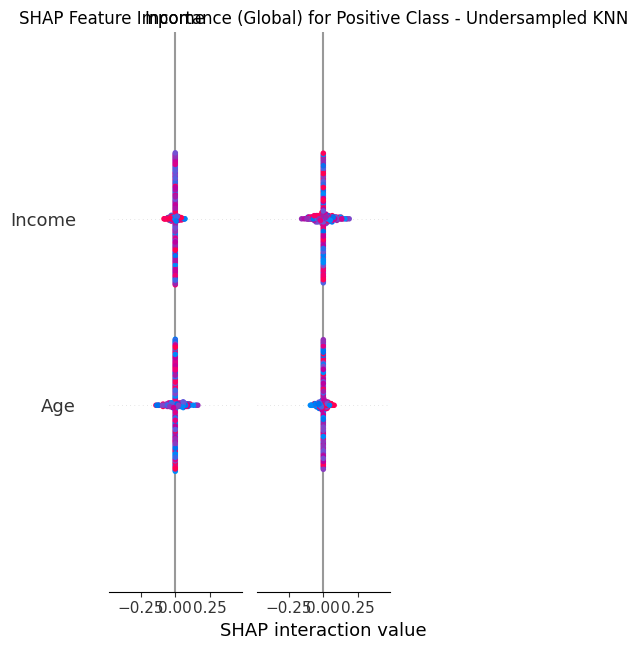

SHAP global feature importance bar plot for Undersampled KNeighborsClassifier generated successfully.


In [62]:
import matplotlib.pyplot as plt
import shap

# 1. Initialize KernelExplainer for knn_undersampled_model
# Using a small sample of X_train_undersampled for the background dataset for computational efficiency
explainer_undersampled = shap.KernelExplainer(knn_undersampled_model.predict_proba, shap.sample(X_train_undersampled, 100))

# 2. Calculate SHAP values for the test set using the numeric X_test_numeric
# Ensure to extract the SHAP values for the positive class (index 1)
shap_values_undersampled = explainer_undersampled.shap_values(X_test_numeric)

# If shap_values is a list of arrays (for multi-output models), we need to handle it.
# For binary classification, KernelExplainer with predict_proba returns a list of two arrays.
# We want to explain the prediction of the positive class (Outcome=1), which is typically at index 1.
if isinstance(shap_values_undersampled, list):
    shap_values_for_plot_undersampled = shap_values_undersampled[1]
else:
    shap_values_for_plot_undersampled = shap_values_undersampled

# 3. Generate a SHAP summary plot (bar plot) for global feature importance
shap.summary_plot(shap_values_for_plot_undersampled, X_test_numeric, plot_type="bar", show=False)

# 4. Add a title to the plot
plt.title("SHAP Feature Importance (Global) for Positive Class - Undersampled KNN")

# 5. Adjust plot parameters for a tight layout
plt.tight_layout()

# 6. Display the plot
plt.show()

print("SHAP global feature importance bar plot for Undersampled KNeighborsClassifier generated successfully.")

/tmp/ipython-input-709561617.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y='F1-Score', data=metrics_df, ax=axes[0], palette='viridis')
/tmp/ipython-input-709561617.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y='ROC-AUC', data=metrics_df, ax=axes[1], palette='plasma')


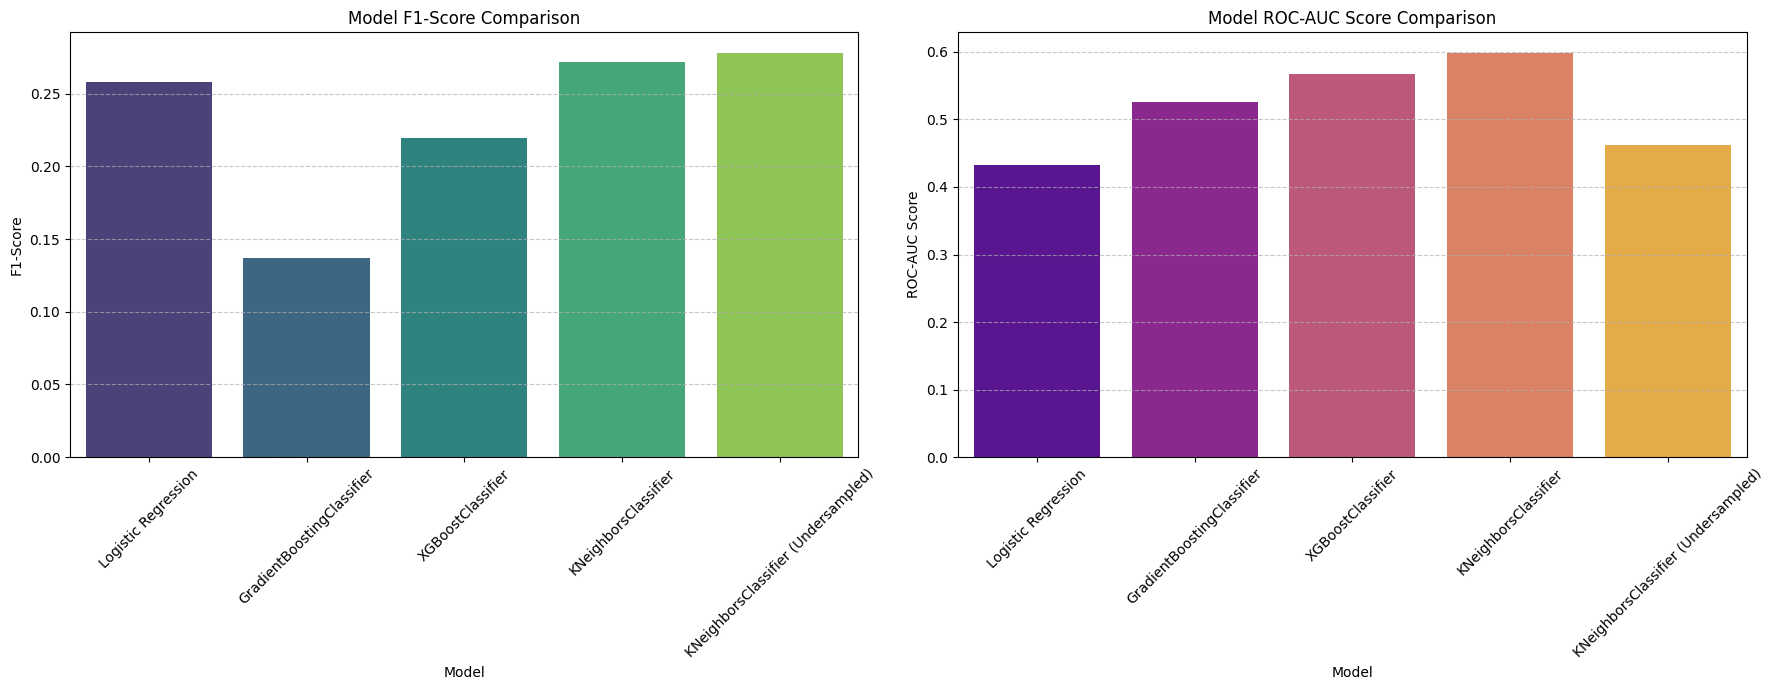

Model performance comparison plots for F1-Score and ROC-AUC generated successfully.


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract 'F1-Score' and 'ROC-AUC' columns
metrics_df = performance_df_updated[['F1-Score', 'ROC-AUC']]

# Set up the matplotlib figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 2. Create a bar chart for F1-Scores
sns.barplot(x=metrics_df.index, y='F1-Score', data=metrics_df, ax=axes[0], palette='viridis')
axes[0].set_title('Model F1-Score Comparison')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('F1-Score')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 3. Create a bar chart for ROC-AUC scores
sns.barplot(x=metrics_df.index, y='ROC-AUC', data=metrics_df, ax=axes[1], palette='plasma')
axes[1].set_title('Model ROC-AUC Score Comparison')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('ROC-AUC Score')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()
plt.show()

print("Model performance comparison plots for F1-Score and ROC-AUC generated successfully.")

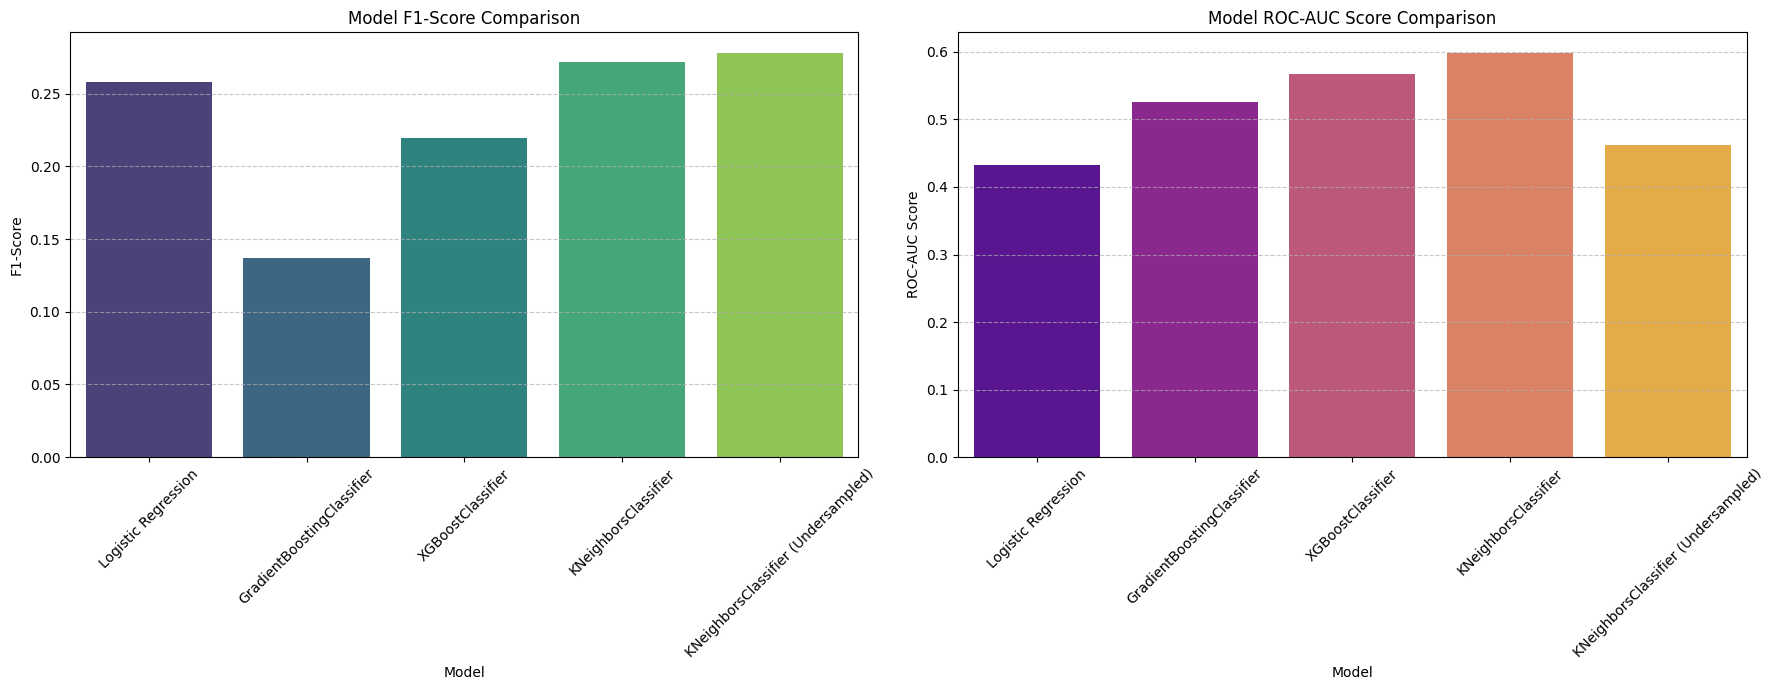

Model performance comparison plots for F1-Score and ROC-AUC generated successfully.


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract 'F1-Score' and 'ROC-AUC' columns
metrics_df = performance_df_updated[['F1-Score', 'ROC-AUC']]

# Set up the matplotlib figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 2. Create a bar chart for F1-Scores
sns.barplot(x=metrics_df.index, y='F1-Score', data=metrics_df, ax=axes[0], palette='viridis', hue=metrics_df.index, legend=False)
axes[0].set_title('Model F1-Score Comparison')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('F1-Score')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 3. Create a bar chart for ROC-AUC scores
sns.barplot(x=metrics_df.index, y='ROC-AUC', data=metrics_df, ax=axes[1], palette='plasma', hue=metrics_df.index, legend=False)
axes[1].set_title('Model ROC-AUC Score Comparison')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('ROC-AUC Score')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()
plt.show()

print("Model performance comparison plots for F1-Score and ROC-AUC generated successfully.")